In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Activation, Input, Flatten, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as K
from tensorflow.keras.backend import clear_session
from tensorflow.keras.metrics import Precision, Recall
import numpy as np

In [2]:
def get_model(input_shape=(288,432, 4), classes=2):
    model_input = Input(input_shape)

    model = Conv2D(8, kernel_size=(3,3),strides=(1,1))(model_input)
    model = BatchNormalization(axis=3)(model)
    model = Activation('relu')(model)
    model = MaxPooling2D((2,2))(model)

    model = Conv2D(16, kernel_size=(3,3),strides=(1,1))(model)
    model = BatchNormalization(axis=3)(model)
    model = Activation('relu')(model)
    model = MaxPooling2D((2,2))(model)

    model = Conv2D(32, kernel_size=(3,3),strides=(1,1))(model)
    model = BatchNormalization(axis=3)(model)
    model = Activation('relu')(model)
    model = MaxPooling2D((2,2))(model)

    model = Conv2D(64, kernel_size=(3,3),strides=(1,1))(model)
    model = BatchNormalization(axis=-1)(model)
    model = Activation('relu')(model)
    model = MaxPooling2D((2,2))(model)

    model = Conv2D(128, kernel_size=(3,3),strides=(1,1))(model)
    model = BatchNormalization(axis=-1)(model)
    model = Activation('relu')(model)
    model = MaxPooling2D((2,2))(model)

    model = Flatten()(model)
    
    model = Dropout(0.3)(model)

    model = Dense(classes, activation='softmax', name=f'output-{str(classes)}-classes')(model)

    model = Model(inputs=model_input, outputs=model, name='PalosModel')

    return model

In [3]:
train_dir = '../../assets/dataset/train/'
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(288,432), class_mode="categorical", color_mode='rgba')

test_dir = '../../assets/dataset/test/'
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(288,432), class_mode="categorical", color_mode='rgba')

Found 4039 images belonging to 3 classes.
Found 1007 images belonging to 3 classes.


2021-10-14 16:42:44.385525: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2021-10-14 16:42:44.385599: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BIG-ALE): /proc/driver/nvidia/version does not exist
2021-10-14 16:42:44.387061: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


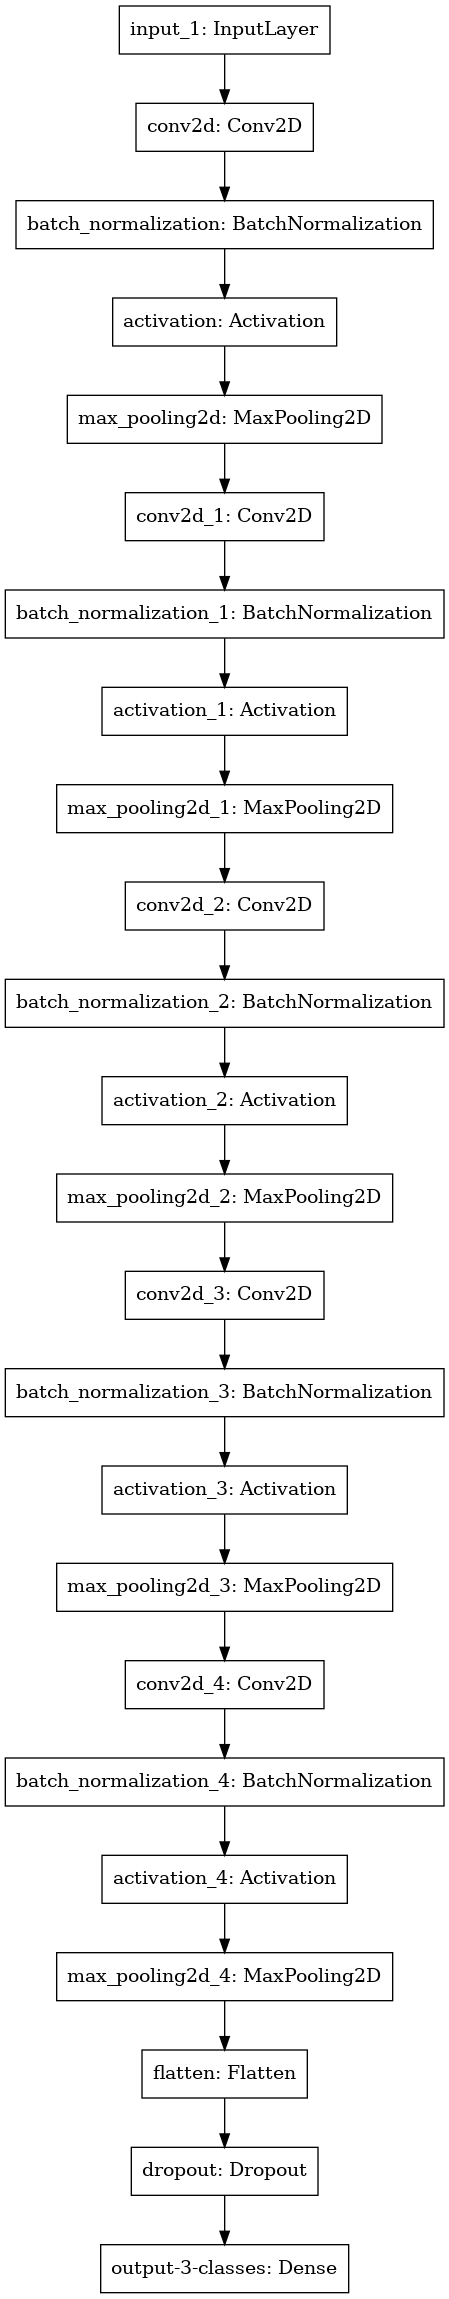

In [4]:
model = get_model(classes=len(np.unique(test_generator.labels)))

plot_model(model)

In [6]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [6]:
clear_session()

In [7]:
opt = Adam(learning_rate=0.000005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

model.fit(train_generator, epochs=70, validation_data=test_generator)

2021-10-13 18:23:31.268846: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-13 18:23:31.269896: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3491910000 Hz


Epoch 1/70
127/127 [==============================] - 289s 2s/step - loss: 1.5047 - accuracy: 0.3585 - precision: 0.3755 - recall: 0.2902 - get_f1: 0.3268 - val_loss: 1.2062 - val_accuracy: 0.3595 - val_precision: 0.3746 - val_recall: 0.2582 - val_get_f1: 0.3013
Epoch 2/70
127/127 [==============================] - 268s 2s/step - loss: 1.1197 - accuracy: 0.5042 - precision: 0.5302 - recall: 0.4199 - get_f1: 0.4667 - val_loss: 0.9598 - val_accuracy: 0.5521 - val_precision: 0.5769 - val_recall: 0.4171 - val_get_f1: 0.4839
Epoch 3/70
127/127 [==============================] - 364s 3s/step - loss: 1.0149 - accuracy: 0.5564 - precision: 0.5840 - recall: 0.4873 - get_f1: 0.5305 - val_loss: 0.7765 - val_accuracy: 0.6822 - val_precision: 0.7247 - val_recall: 0.5750 - val_get_f1: 0.6413
Epoch 4/70
127/127 [==============================] - 355s 3s/step - loss: 0.9049 - accuracy: 0.6054 - precision: 0.6457 - recall: 0.5406 - get_f1: 0.5884 - val_loss: 0.6979 - val_accuracy: 0.7100 - val_precisio

KeyboardInterrupt: 

In [3]:
model = tf.keras.models.load_model("../../assets/models/conv_model_100_epochs.h5")